In [150]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

#Read in all book reviews

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier

books = ["Andy-Weir-The-Martian.csv", "Donna-Tartt-The-Goldfinch.csv", 
         "EL-James-Fifty-Shades-of-Grey.csv", "Fillian_Flynn-Gone_Girl.csv", 
         "John-Green-The-Fault-in-our-Stars.csv", "Laura-Hillenbrand-Unbroken.csv", 
         "Paula_Hawkins-The-Girl-On-The-Train.csv", "Suzanne-Collins-The-Hunger-Games.csv"]

In [151]:
rev1 = pd.read_csv("Andy-Weir-The-Martian.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev2 = pd.read_csv("Donna-Tartt-The-Goldfinch.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev3 = pd.read_csv("EL-James-Fifty-Shades-of-Grey.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev4 = pd.read_csv("Fillian_Flynn-Gone_Girl.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev5 = pd.read_csv("John-Green-The-Fault-in-our-Stars.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev6 = pd.read_csv("Laura-Hillenbrand-Unbroken.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev7 = pd.read_csv("Paula_Hawkins-The-Girl-On-The-Train.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

rev8 = pd.read_csv("Suzanne-Collins-The-Hunger-Games.csv", sep='\t', 
                  names = ["Review Score", "Tail of Review URL", "Review Title", "Review Text"])

In [152]:
all_reviews = [rev1, rev2, rev3, rev4, rev5, rev6, rev7, rev8]

In [153]:
for r in all_reviews:
    r['Review Text'] = r['Review Text'].map(lambda x: x.lstrip('<span class="a-size-base review-text">').rstrip('</span>'))
    r['Review Text'] = r['Review Text'].map(lambda x: x.replace('<br/><br/>', ' '))
    r['Review Text'] = r['Review Text'].map(lambda x: x.replace('<br/>', ' '))
    
print all_reviews[5]['Review Text'][143] #1. Index 5 is actually rev6 - Unbroken. 2. Side note: This does not have slashes...

You don't have to look any further than the title to find the theme of this book. Unbroken: A World War II Book of Survival, Resilience and Redemption by Laura Hillenbrand is not a military history book in the scholarly sense anyway, but you will learn something about this war and its casualties. Rather, this is a book of the human soul - finding strength, commitment, compassion and ultimately, forgiveness. The star of this show is Louis Zamperini (or Louie, as he's known throughout the book). Everything else, the history of the war, etc., is the frame which Louie's story sits within. We learn something new, or find something we can relate to, and think about, on every page. Even those of us that weren't born yet during that time, or those of us that are not students of history, will relate. In Unbroken, we follow Louis from his childhood days as a thief, the love of his family that broke him of that habit for a love of track, to the 1936 Berlin Olympics, to the war, his POW experience

In [156]:
def stringSlasher(input_string, get_rid_of):
    return input_string.replace(get_rid_of, "")

for r in all_reviews:
    rev_text_col = r['Review Text']
    for idx in rev_text_col:
        in_between_slashes = idx
        get_rid_of = "\\"
        
        result3 = stringSlasher(in_between_slashes, get_rid_of)

print("stringSlasher(in_between_slashes) = " + result3) #This is the last review in the last book (rev8, column: 'Review Text', review #: 24027, index#: 24026)

stringSlasher(in_between_slashes) = If I could rate this book a zero I would... The book was to all over the place.. Ive herd many good things about this book aand the others...Woorst book I hae EVER reead  Dont read it!!!!!!!!


str

In [157]:
import re
word1 = " ".join(re.findall("[a-zA-Z]+", result3))
print word1 #JUST WORDS!!

If I could rate this book a zero I would The book was to all over the place Ive herd many good things about this book aand the others Woorst book I hae EVER reead Dont read it


In [158]:
#Getting doc into vector and getting word/freq counts
from sklearn.feature_extraction.text import CountVectorizer

for r in all_reviews:

    def make_xy(r, vectorizer=None):
        #Your code here    
        if vectorizer is None:
            vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(r['Review Text'])
        X = X.tocsc()  # some versions of sklearn return COO format
        y = (r['Review Score']).values.astype(np.int)
        return X, y
    X, y = make_xy(r)

In [21]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.cross_validation import train_test_split
# xtrain, xtest, ytrain, ytest = train_test_s"Donna-Tartt-The-Goldfinch.csv"plit(X, y)
# clf = MultinomialNB().fit(xtrain,ytrain)
# print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtrain, ytrain))
# print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

In [159]:
from sklearn.naive_bayes import MultinomialNB #model_selection produces higher accuracy %'s
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain,ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtrain, ytrain))
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 74.08%
MN Accuracy: 68.54%


In [19]:
rev1_ratings = []

for line in open("Andy-Weir-The-Martian.csv"):
    rev1_ratings.append(int(line[0]))

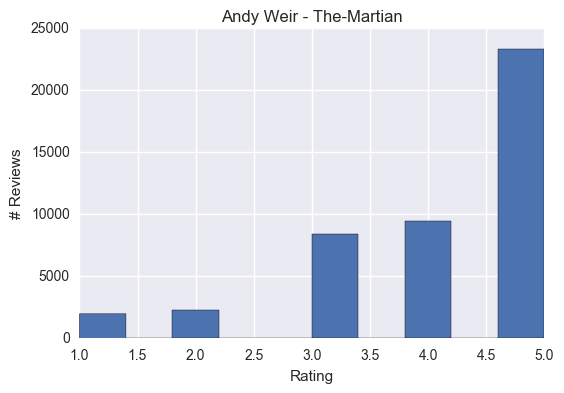

In [36]:
plt.hist(rev1_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Andy Weir - The-Martian")
plt.show()

In [24]:
rev2_ratings = []

for line in open("Donna-Tartt-The-Goldfinch.csv"):
    rev2_ratings.append(int(line[0]))

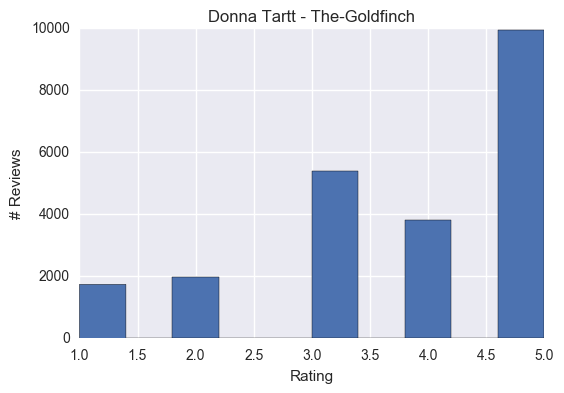

In [37]:
plt.hist(rev2_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Donna Tartt - The-Goldfinch")
plt.show()

In [38]:
rev3_ratings = []

for line in open("EL-James-Fifty-Shades-of-Grey.csv"):
    rev3_ratings.append(int(line[0]))

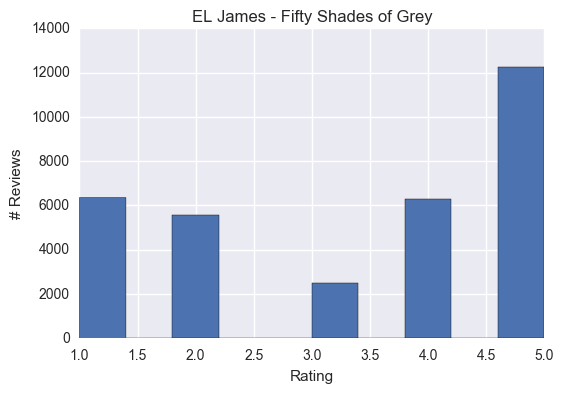

In [39]:
plt.hist(rev3_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("EL James - Fifty Shades of Grey")
plt.show()

In [32]:
rev4_ratings = []

for line in open("Fillian_Flynn-Gone_Girl.csv"):
    rev4_ratings.append(int(line[0]))

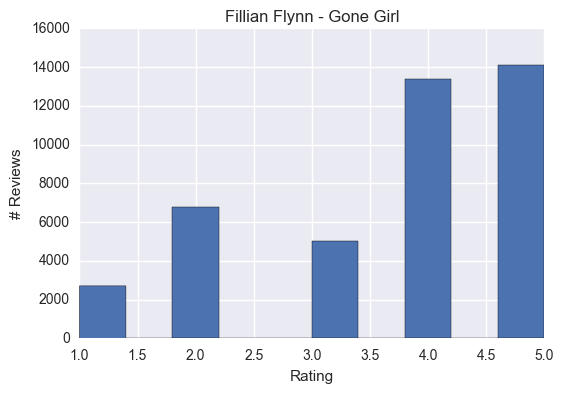

In [40]:
plt.hist(rev4_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Fillian Flynn - Gone Girl")
plt.show()

In [34]:
rev5_ratings = []

for line in open("John-Green-The-Fault-in-our-Stars.csv"):
    rev5_ratings.append(int(line[0]))

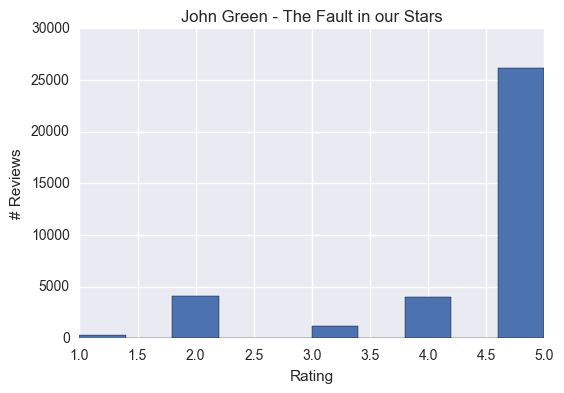

In [41]:
plt.hist(rev5_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("John Green - The Fault in our Stars")
plt.show()

In [42]:
rev6_ratings = []

for line in open("Laura-Hillenbrand-Unbroken.csv"):
    rev6_ratings.append(int(line[0]))

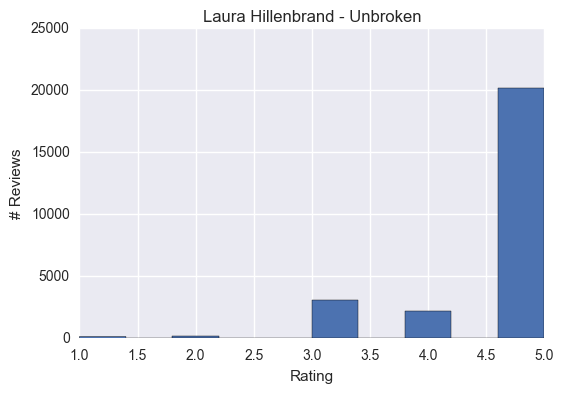

In [43]:
plt.hist(rev6_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Laura Hillenbrand - Unbroken")
plt.show()

In [44]:
rev7_ratings = []

for line in open("Paula_Hawkins-The-Girl-On-The-Train.csv"):
    rev7_ratings.append(int(line[0]))

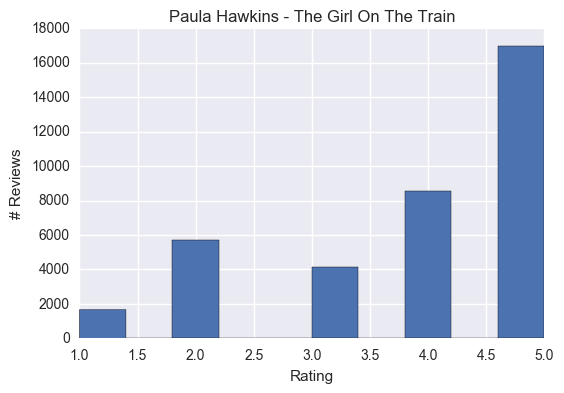

In [45]:
plt.hist(rev7_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Paula Hawkins - The Girl On The Train")
plt.show()

In [46]:
rev8_ratings = []

for line in open("Suzanne-Collins-The-Hunger-Games.csv"):
    rev8_ratings.append(int(line[0]))

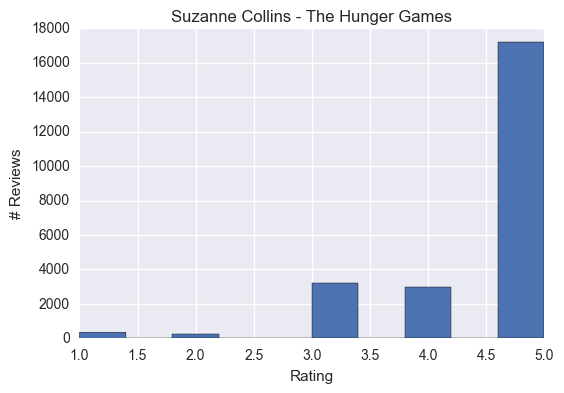

In [47]:
plt.hist(rev8_ratings)
plt.xlabel("Rating")
plt.ylabel("# Reviews")
plt.title("Suzanne Collins - The Hunger Games")
plt.show()

In [ ]:
#Based on each book's ratings' distribution, the distribution with the most representaives per rating
#and the least different in counts between ratings is: "Fifty Shades of Grey".
#This will be used as the good dataset in training the model.

#In contrast, the distribution with the least representaives per rating
#and the most different in counts between ratings is: "Unbroken".
#This will be used as the bad dataset in training the model.

In [69]:
#rev6 Unbroken - BEST Dataset

Unbroken_Neg = []
Unbroken_Neutral = []
Unbroken_Pos = []

for line in open("Laura-Hillenbrand-Unbroken.csv"):
    if int(line[0]) == 1 or int(line[0]) == 2:
        Unbroken_Neg.append(line)
    elif int(line[0]) == 3:
        Unbroken_Neutral.append(line)
    else:
        Unbroken_Pos.append(line)

In [70]:
#Unbroken is book#6: 

rev6['Review Text'] = rev6['Review Text'].map(lambda x: x.lstrip('<span class="a-size-base review-text">').rstrip('</span>'))
rev6['Review Text'] = rev6['Review Text'].map(lambda x: x.replace('<br/><br/>', ' '))
rev6['Review Text'] = rev6['Review Text'].map(lambda x: x.replace('<br/>', ' '))
rev6['Review Text'][145] #check to see if review is cleared of HTML.

'At first when I considered reading this I was a little dissuaded by Victorio\'s review stating that the author had given the book some \'personal coloring\'. I wrote a reply to his review stating that in fact his own words are misleading and that he misrepresents what the book actually says so that his review is by his own definition \'dishonest\'. The way things happen verses what actually happened during these horendous times are certainly two different things. I don\'t know how a reviewer can read this book and say that the author embellished at all. Maybe his sources embellished but what can he do about that? If your considering reading this book at all - do it. You won\'t be sorry. The first half or two thirds of the book deal with Louie\'s life before the military, the military, capture and confinement in Japan. The last part deals with the aftermath - when Louie gets home. Reading this book you get a tiny bit of history from the Japanese side. There\'s not much of that around f

In [71]:
def stringSlasher(input_string, get_rid_of):
    return input_string.replace(get_rid_of, "")

in_between_slashes = rev6['Review Text']
get_rid_of = "\\"

result3 = stringSlasher(in_between_slashes, get_rid_of)
# print("stringSlasher(in_between_slashes) = " + result3)

In [68]:
# print result3

In [65]:
import re

Unbroken_CleanTxt = []

for r in result3:
    words = " ".join(re.findall("[a-zA-Z]+", r))
    Unbroken_CleanTxt.append(words)

print Unbroken_CleanTxt[4]

In Unbroken A World War II Story of Survival Resilience and Redemption author Laura Hillenbrand of a class a link normal href Seabiscuit An American Legend dp Seabiscuit An American Legend a tells the story of Louis Zamperini a bad boy turned track and field star who participated in the Berlin Olympic and even met Hitler Narrowly escaping arrest for attempting to piler a Nazi flag Zamperini returned home washed out as a pilot and eventually ended up in the Army Air Corps as a B bombardier Then in May his plane goes down He and one of his crewmates endure over days before they find land but unfortunately they land in enemy terrain and are sent to a POW camp where the story gets even more harrowing and brutal The story of Zamperini s ordeal survival and eventual return home with its own attendant struggles is one of the most gripping tales of heroism and sheer toughness mental and physical that I have ever read I must admit I was a bit worried that Ms Hillenbrand after having written the

In [66]:
from sklearn.feature_extraction.text import CountVectorizer


def make_xy(rev6, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(Unbroken_CleanTxt)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (rev6['Review Score']).values.astype(np.int)
    return X, y
X, y = make_xy(rev6)

In [67]:
#Best Dataset Accuracy

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain,ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtrain, ytrain))
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 79.50%
MN Accuracy: 76.46%


In [130]:
#rev4 Gone Girl - WORST Dataset

GoneGirl_Neg = []
GoneGirl_Neutral = []
GoneGirl_Pos = []

for line in open("Suzanne-Collins-The-Hunger-Games.csv"):
    if int(line[0]) == 1 or int(line[0]) == 2:
        GoneGirl_Neg.append(line)
    elif int(line[0]) == 3:
        GoneGirl_Neutral.append(line)
    else:
        GoneGirl_Pos.append(line)

In [138]:
#Gone Girl is book#4: 

rev4['Review Text'] = rev4['Review Text'].map(lambda x: x.lstrip('<span class="a-size-base review-text">').rstrip('</span>'))
rev4['Review Text'] = rev4['Review Text'].map(lambda x: x.replace('<br/><br/>', ' '))
rev4['Review Text'] = rev4['Review Text'].map(lambda x: x.replace('<br/>', ' '))
rev4['Review Text'][135] #check to see if review is cleared of HTML.

'Gillian Flynn is maturing as a writer, and this book is proof. I would have been happy had she kept going with the nauseatingly violent mysteries, but this novel is so much more sophisticated and is by far her best! There is much to discuss here, from gender imbalances and assumptions about relationships, especially marriage, to self-mythologizing. I noticed one 1-star reviewer complaining that this was "poor writing" -- I\'d love to see a single example?? Yes, there is swearing and sexual language -- but this writing is finely, carefully crafted. She doesn\'t make a single misstep, not in plot, nor style, nor grammar. Most of the low reviews also say that the ending is abrupt and/or disappointing. Again, I have to disagree.  Without giving anything away, the resolution reminded me of the films "Secretary" and "May".  In a Frankenstein-esque fashion, Flynn plays with the idea that in our relationships, we create (or re-create) each other as much as we do ourselves - some people\'s dem

In [140]:
def stringSlasher(input_string, get_rid_of):
    return input_string.replace(get_rid_of, "")

in_between_slashes = rev4['Review Text']
get_rid_of = "\\"

result3 = stringSlasher(in_between_slashes, get_rid_of)
# print("stringSlasher(in_between_slashes) = " + result3)

In [141]:
import re

GoneGirl_CleanTxt = []

for r in result3:
    words = " ".join(re.findall("[a-zA-Z]+", r))
    GoneGirl_CleanTxt.append(words)

print GoneGirl_CleanTxt[140]

I decided to read Gone Girl because of all the hype surrounding it For the first half of the book I thought it was okay well written interesting characters but a bit drawn out and also predictable as I was SO SURE I knew what had actually happened Then I started Part II of the book and OMG I so did not see any of that coming The author really pulls one over on her readers here and in a very good way I can t wait for this book to eventually be made into a movie as it has the potential to be super awesome I was very anxious to see how everything in the book would resolve itself forgive me for being so vague I don t want to ruin it by giving anything away The end of the book is quite a surprise and for me at least it left me a tad disappointed as I d imagined and hoped for a different resolution But all of these surprises are what make Gone Girl such a unique and engaging book This is a must read this summer


In [142]:
from sklearn.feature_extraction.text import CountVectorizer


def make_xy(rev4, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(GoneGirl_CleanTxt)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (rev4['Review Score']).values.astype(np.int)
    return X, y
X, y = make_xy(rev4)

In [143]:
#Good Dataset Accuracy

from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain,ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtrain, ytrain))
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))

MN Accuracy: 48.89%
MN Accuracy: 32.57%


In [ ]:
#This is an unexpected result with Unbroken being the best dataset and Gone Girl being the worst dataset.
#Usually, good training sets would have even and ample representations of each class. Given, it would
#have been The Goldfinch as the best dataset and The Fault in our Stars as the worse dataset.
#However, based on accuracy percentages, Unbroken is the best dataset and Gone Girl is the worst dataset.